Iteration Time:
8
Centers:
[[0.1061216  3.36638429]
 [2.96848216 0.08491608]
 [4.43057387 3.94993736]]
Kmeans Centers:
[[2.96848216 0.08491608]
 [4.44552766 3.95379041]
 [0.13527578 3.36688259]]


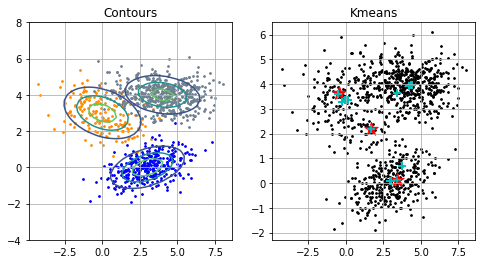

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Contours
def gauss2D(x, m, C):
    C1 = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(C1,(x-m))))
    den = 2 * np.pi * np.sqrt(dC)
    return num/den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-4, 8, nx)
    y = np.linspace(-4, 8, ny)
    X, Y = np.meshgrid(x,y, indexing='ij')
    
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j],Y[i,j]])
            Z[i,j] = gauss2D(xvec,m,C)
            
    return X,Y,Z


# 
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)
# Define three means
Means = np.array([[0, 3], [3, 0], [4,4]])

# Define three covariance matrices ensuring they are positive definite
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j, :, :] = make_spd_matrix(2)  # 随机的堆成的正定矩阵

# Priors
# How many data in each component (1000 in total)
w = np.random.rand(3)
w = w / np.sum(w)   # w mean

nData = np.floor(w * 1000).astype(int)  # 向下取整

# Draw samples from each component
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])
# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ax[1].scatter(X0[:, 0], X0[:, 1], c='k', s=3)
ax[1].scatter(X1[:, 0], X1[:, 1], c='k', s=3)
ax[1].scatter(X2[:, 0], X2[:, 1], c='k', s=3)
ax[1].set_title('Kmeans') 
ax[1].grid(True) 
nx, ny = 50, 40
x0, y0, z0 = twoDGaussianPlot(nx,ny,Means[0],CovMatrices[0,:,:])
x1, y1, z1 = twoDGaussianPlot(nx,ny,Means[1],CovMatrices[1,:,:])
x2, y2, z2 = twoDGaussianPlot(nx,ny,Means[2],CovMatrices[2,:,:])
ax[0].scatter(X0[:, 0], X0[:, 1], c='darkorange', s=3)
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', s=3)
ax[0].scatter(X2[:, 0], X2[:, 1], c='slategrey', s=3)
ax[0].contour(x0,y0,z0,3)
ax[0].contour(x1,y1,z1,3)
ax[0].contour(x2,y2,z2,3)
ax[0].set_title('Contours') 
ax[0].grid(True) 

k=3
centers = X[np.floor(np.random.rand(k)*len(X)).astype(int)]
ax[1].scatter(centers[:,0], centers[:,1], marker='*', s=200, c='r')


# kmeans iteration
distance = np.zeros((len(X),k))
clusters = np.zeros(len(X))
num = 0
error = 1
old_centers = np.zeros((k,2))
while error:
    for i in range(len(X)):
        for j in range(k):
            distance[i,j] = np.linalg.norm(centers[j]- X[i])
            clusters[i] = np.argmin(distance[i,:])
    
    
    for i in range(k):
        old_centers[i] = centers[i]
        points = np.zeros((1,2))
        count = 0
        for j in range(len(clusters)):
            if clusters[j] == i:
                points += X[j]
                count += 1
        centers[i] = points / count
        ax[1].scatter(centers[:,0], centers[:,1], marker='+',s=50, c='c')
    num += 1
    error = np.linalg.norm(centers-old_centers)

print('Iteration Time:')
print(num)
print('Centers:')
print(centers)

from sklearn.cluster import KMeans
kmeans = KMeans(k)
kmeans.fit(X)
C_kmeans = kmeans.cluster_centers_
print('Kmeans Centers:')
print(C_kmeans)